# Data Science Challenge








# Table of Contents

1. [Exercise1](#Exercise1) 
  . [*Solution*](#Exercise1)        
2. [Exercise2](#Exercise2)
  . [*Solution*](#Sol2)
3. [Exercise3](#Exercise3)
  . [*Solution*](#Sol3)
4. [Exercise4](#Exercise4)
  . [*Solution*](#Sol4)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


### Number of lines in each file - first aproach - shell command

In [5]:
!bzcat /home/dsc/data/challenge/searches.csv.bz2 | wc -l

20390198


In [6]:
!bzcat /home/dsc/data/challenge/bookings.csv.bz2 | wc -l

10000011


In [7]:
#sample data to work with
!ls -l /home/dsc/data/challenge/
!pwd
!bzcat /home/dsc/data/challenge/searches.csv.bz2 | head -10000 | bzip2 > searches.sample.csv.bz2
!bzcat /home/dsc/data/challenge/bookings.csv.bz2 | head -10000 | bzip2 > bookings.sample.csv.bz2


total 1014604
-rw-r--r-- 1 dsc dsc 554970628 abr 10  2021 bookings.csv.bz2
-rw-rw-r-- 1 dsc dsc    535893 jun 11 21:04 bookings.sample.csv.bz2
-rw-r--r-- 1 dsc dsc 483188920 abr 10  2021 searches.csv.bz2
-rw-rw-r-- 1 dsc dsc    244720 jun 11 21:04 searches.sample.csv.bz2
/home/dsc/07_Data_Science_Challenge

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/data/challenge/searches.csv.bz2, output file = (stdout)

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/data/challenge/bookings.csv.bz2, output file = (stdout)


In [8]:
!ls -l 
#\rm searches.sample.csv
# split dataFile into Nfiles of size 1Mb. Quite quick, does not keep header except for first created subfile
! bzcat bookings.sample.csv.bz2| split -b 1M -d -a 4 --filter='bzip2 > $FILE.bz2' - split_bookings_
#!\rm split*

total 1064
-rw-r--r-- 1 dsc dsc 230559 jun  9 17:48 airports_geonames_only_clean.csv
-rw-rw-r-- 1 dsc dsc 535893 jun 12 11:38 bookings.sample.csv.bz2
-rw-rw-r-- 1 dsc dsc  15270 jun 12 11:37 Data_science_challenge.ipynb
-rw-r--r-- 1 dsc dsc  57002 jun 11 23:37 DS_Challenge.draft.ipynb
-rw-rw-r-- 1 dsc dsc 244720 jun 12 11:38 searches.sample.csv.bz2


In [9]:
!ls -l

total 1604
-rw-r--r-- 1 dsc dsc 230559 jun  9 17:48 airports_geonames_only_clean.csv
-rw-rw-r-- 1 dsc dsc 535893 jun 12 11:38 bookings.sample.csv.bz2
-rw-rw-r-- 1 dsc dsc  15270 jun 12 11:37 Data_science_challenge.ipynb
-rw-r--r-- 1 dsc dsc  57002 jun 11 23:37 DS_Challenge.draft.ipynb
-rw-rw-r-- 1 dsc dsc 244720 jun 12 11:38 searches.sample.csv.bz2
-rw-rw-r-- 1 dsc dsc 134566 jun 12 11:38 split_bookings_0000.bz2
-rw-rw-r-- 1 dsc dsc 134333 jun 12 11:38 split_bookings_0001.bz2
-rw-rw-r-- 1 dsc dsc 135751 jun 12 11:38 split_bookings_0002.bz2
-rw-rw-r-- 1 dsc dsc 134062 jun 12 11:38 split_bookings_0003.bz2
-rw-rw-r-- 1 dsc dsc   6699 jun 12 11:38 split_bookings_0004.bz2


# Exercise 1  <a name="Exercise1"></a>

#### Number of lines in each file - second aproach -bz2

In [37]:
import bz2


 <a name="Sol1"></a>


In [12]:
count=0
#with  bz2.BZ2File('./bookings.sample.csv.bz2') as bk:
with  bz2.BZ2File('/home/dsc/data/challenge/bookings.csv.bz2') as bk:
    for i in bk:
        count +=1
print(count)

10000011


In [13]:
count=0
#with  bz2.BZ2File('./bookings.sample.csv.bz2') as bk:
with  bz2.BZ2File('/home/dsc/data/challenge/searches.csv.bz2') as bk:
    for i in bk:
        count +=1
print(count)

20390199


## How does the data look like

In [14]:
!bzcat bookings.sample.csv.bz2 | head -5

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     
2013-03-26 00:00:00^1A    ^US      ^e612b9eeeee6f17f42d9b0d3b79e75ca^7437560d8f276d6d05eeb806d9e7edee^737295a86982c941f1c2da9a46a14043^2013-03-26 00:00:00^135270^0^SAL     ^SAL     ^SV      ^

## Reading files - pd.read_csv. Using sample files

In [15]:
bk_df= pd.read_csv('./bookings.sample.csv.bz2', compression='bz2',  sep='^')
type(bk_df)

pandas.core.frame.DataFrame

In [16]:
sh_df= pd.read_csv('./searches.sample.csv.bz2', compression='bz2',  sep='^')
type(sh_df)

pandas.core.frame.DataFrame

In [17]:
bk_df.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [18]:
sh_df.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [19]:
bk_df.dtypes

act_date               object
source                 object
pos_ctry               object
pos_iata               object
pos_oid                object
rloc                   object
cre_date               object
duration                int64
distance                int64
dep_port               object
dep_city               object
dep_ctry               object
arr_port               object
arr_city               object
arr_ctry               object
lst_port               object
lst_city               object
lst_ctry               object
brd_port               object
brd_city               object
brd_ctry               object
off_port               object
off_city               object
off_ctry               object
mkt_port               object
mkt_city               object
mkt_ctry               object
intl                    int64
route                  object
carrier                object
bkg_class              object
cab_class              object
brd_time               object
off_time  

## Some Data Munging

In [20]:
#remove blanks from column name
bk_df.columns = bk_df.columns.str.replace(' ', '').str.upper()
bk_df.columns

Index(['ACT_DATE', 'SOURCE', 'POS_CTRY', 'POS_IATA', 'POS_OID', 'RLOC',
       'CRE_DATE', 'DURATION', 'DISTANCE', 'DEP_PORT', 'DEP_CITY', 'DEP_CTRY',
       'ARR_PORT', 'ARR_CITY', 'ARR_CTRY', 'LST_PORT', 'LST_CITY', 'LST_CTRY',
       'BRD_PORT', 'BRD_CITY', 'BRD_CTRY', 'OFF_PORT', 'OFF_CITY', 'OFF_CTRY',
       'MKT_PORT', 'MKT_CITY', 'MKT_CTRY', 'INTL', 'ROUTE', 'CARRIER',
       'BKG_CLASS', 'CAB_CLASS', 'BRD_TIME', 'OFF_TIME', 'PAX', 'YEAR',
       'MONTH', 'OID'],
      dtype='object')

In [21]:
for col in bk_df.columns:
    print (col,"-", bk_df[col].dtypes)

ACT_DATE - object
SOURCE - object
POS_CTRY - object
POS_IATA - object
POS_OID - object
RLOC - object
CRE_DATE - object
DURATION - int64
DISTANCE - int64
DEP_PORT - object
DEP_CITY - object
DEP_CTRY - object
ARR_PORT - object
ARR_CITY - object
ARR_CTRY - object
LST_PORT - object
LST_CITY - object
LST_CTRY - object
BRD_PORT - object
BRD_CITY - object
BRD_CTRY - object
OFF_PORT - object
OFF_CITY - object
OFF_CTRY - object
MKT_PORT - object
MKT_CITY - object
MKT_CTRY - object
INTL - int64
ROUTE - object
CARRIER - object
BKG_CLASS - object
CAB_CLASS - object
BRD_TIME - object
OFF_TIME - object
PAX - int64
YEAR - int64
MONTH - int64
OID - object


# Exercise 2  <a name="Exercise2"></a>

Top 10 arrival airports in the world in 2013 (using the bookings file)

• Arrival airport is the column arr_port. It is the IATA code for the airport
• To get the total number of passengers for an airport, you can sum the column
pax, grouping by arr_port. Note that there is negative pax. That corresponds to
cancelations. So to get the total number of passengers that have actually
booked, you should sum including the negatives (that will remove the canceled
bookings).
• Print the top 10 arrival airports in the standard output, including the number of
passengers.

• Bonus point: Get the name of the city or airport corresponding to that airport
(programatically, we suggest to have a look at GeoBases in Github)

• Bonus point: Solve this problem using pandas (instead of any other approach


## First aproach - working with sample files

In [22]:
#Top 10 arrival airports in the world in 2013, columns  arr_port (IATA airport),  pax (passengers)
bk_df[bk_df.isnull()].sum()
#s1_bk_df=pd.DataFrame()
bk_df_clean=bk_df.dropna()


In [23]:
bk_df_arrport=bk_df_clean[['ARR_PORT','PAX','YEAR']]
bk_df_arrport.loc[:,"ARR_PORT"] = bk_df_arrport["ARR_PORT"].str.strip().str.upper()

bk_df_arrport.head()

/home/dsc/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,ARR_PORT,PAX,YEAR
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


In [24]:
bk_df_arrport['YEAR'].unique()
#bk_df_arrport['ARR_PORT'].unique()
bk_df_arrport=bk_df_arrport.drop(columns=['YEAR'])

In [25]:
bk_df_arrport.groupby(by='ARR_PORT').sum().sort_values(by ='PAX' ,ascending=False).head(10)

,PAX
ARR_PORT,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


## Solving exercise 2 with chunks  <a name="Sol2"></a>

Large data  (20GB-25GB) se puede trabajar en e lportatil pero no se puede procesar directametnte.

Los iteradores ,como chunk, cuando se leen y se llega al final, la memoría de l mismo se vacía. Por eso al crear un chunck, ejecutar for sobre el mismo e intentar volverlo a hacer... puede leer vacío..

NOTAS: 
chunksize controlado con nrows sirve tambien como sample antes de atacar la base conpleta

bookings_chunks=

partials=[]

for chunak in bookings_chunks:
    partial=chunk.grouoby('arr_port')['pax'].sum()
    
    partials.append(partial)
    
partials

pd.concat(partials).groupby(by=)

In [3]:
#preparamos la importación del fichero con chuncks para poder tratarlo

#bk_df= pd.read_csv('./bookings.sample.csv.bz2', compression='bz2',  sep='^', chunksize=)
#filename='./bookings.sample.csv.bz2'
filename='/home/dsc/data/challenge/bookings.csv.bz2'
chunksize = 10000
list_of_chunks=[]

nchunk=0
with pd.read_csv(filename, compression='bz2',  sep='^', chunksize=chunksize) as reader:
    for chunk in reader:
        
        chunk.columns = chunk.columns.str.replace(' ', '').str.upper() #remove blanks from column name
        chunk_airports=chunk[['ARR_PORT','PAX','YEAR']].dropna() # filtering columns and removing NaN      
        chunk_airports['ARR_PORT']=chunk_airports['ARR_PORT'].str.strip() #remove blanks in column arr_port
        chunk_airports=chunk_airports[chunk_airports['YEAR']==2013] #filtering by year - 2013 (in case there are any other values in the full data)
        chunk_airports=chunk_airports.drop(columns=['YEAR'])
        chunk_airports_out=chunk_airports.groupby(by='ARR_PORT').sum()
        
        list_of_chunks.append(chunk_airports_out)
        nchunk=+1
        
        
final_tble=pd.concat(list_of_chunks)
#print (f'número de chunks= {nchunk}')
                     
top_10_airports=final_tble.groupby(by='ARR_PORT').sum().sort_values(by ='PAX' ,ascending=False).head(10)                                   

In [27]:
top_10_airports.dtypes

PAX    float64
dtype: object

In [28]:
#format output for final output
pd.options.display.float_format = "{:,.0f}".format
top_10_airports=final_tble.groupby(by='ARR_PORT').sum().sort_values(by ='PAX' ,ascending=False).head(10)                   

top_10_airports


,PAX
ARR_PORT,
LHR,"88,809"
MCO,"70,930"
LAX,"70,530"
LAS,"69,630"
JFK,"66,270"
CDG,"64,490"
BKK,"59,460"
MIA,"58,150"
SFO,"58,000"


In [ ]:
# técnica mas simple  -> indicar columnas a la hora de leer
# con el usecols reducimos el espacio de trabajo
all_columns.info(0 )

### Loaded to local : data file airports (IATA & city + country) from Github

In [4]:
#changing back the format to capture decimal units
pd.options.display.float_format = "{:,.2f}".format

In [5]:
# github - search: "geobases" , 
# geobases/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv  -raw (right click) and save as ..
airports=pd.read_csv('/home/dsc/07_Data_Science_Challenge/airports_geonames_only_clean.csv', sep='^', header =None, 
                    names=['ARR_PORT', 'CITY', 'IATA','cod','COUNTRY','coord_X','coord_Y'])
airports.head()


,ARR_PORT,CITY,IATA,cod,COUNTRY,coord_X,coord_Y
0,AUH,Abu Dhabi International Airport,AUH,AE,United Arab Emirates,24.43,54.65
1,AZI,Abu Dhabi Bateen Airport,AUH,AE,United Arab Emirates,24.43,54.46
2,AAN,Al Ain International Airport,AAN,AE,United Arab Emirates,24.26,55.61
3,DXB,Dubai International Airport,DXB,AE,United Arab Emirates,25.25,55.36
4,FJR,Fujairah,FJR,AE,United Arab Emirates,25.11,56.32


### Not need to download the data: data file airports (IATA & city + country) from Github with pandas

In [6]:
# downloading the data_file directly from github with pandas
# entering the raw data 
url_git_airports = 'https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv'
airports = pd.read_csv(url_git_airports, sep='^', header =None, 
                       names=['ARR_PORT', 'CITY', 'IATA','cod','COUNTRY','coord_X','coord_Y'])
airports.head()

,ARR_PORT,CITY,IATA,cod,COUNTRY,coord_X,coord_Y
0,AUH,Abu Dhabi International Airport,AUH,AE,United Arab Emirates,24.43,54.65
1,AZI,Abu Dhabi Bateen Airport,AUH,AE,United Arab Emirates,24.43,54.46
2,AAN,Al Ain International Airport,AAN,AE,United Arab Emirates,24.26,55.61
3,DXB,Dubai International Airport,DXB,AE,United Arab Emirates,25.25,55.36
4,FJR,Fujairah,FJR,AE,United Arab Emirates,25.11,56.32


In [33]:
# checking dimension
count_row = airports.shape[0]  # Gives number of rows
count_col = airports.shape[1]  # Gives number of columns
count_row
airports.shape[:]
#airports.nunique()

(3559, 7)

In [7]:
# merging files in order to add cities to top_10_airports_2013
top_10_airports_cities_2013=top_10_airports.merge(airports[['ARR_PORT', 'CITY','COUNTRY']],
                                                  how='left',left_on='ARR_PORT', right_on='ARR_PORT')

pd.options.display.float_format = "{:,.0f}".format
top_10_airports_cities_2013

,ARR_PORT,PAX,CITY,COUNTRY
0,LHR,"88,809",London Heathrow Airport,United Kingdom
1,MCO,"70,930",Orlando International Airport,United States
2,LAX,"70,530",Los Angeles International Airport,United States
3,LAS,"69,630",McCarran International Airport,United States
4,JFK,"66,270",John F Kennedy International Airport,United States
5,CDG,"64,490",Paris - Charles-de-Gaulle,France
6,BKK,"59,460",Suvarnabhumi,Thailand
7,MIA,"58,150",Miami International Airport,United States
8,SFO,"58,000",San Francisco International Airport,United States
9,DXB,"55,590",Dubai International Airport,United Arab Emirates


# Exercise 3  <a name="Exercise3"></a>

Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

 • For the arriving airport, you can use the Destination column in the searches file. 
 
 • Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure. 
 
 • Bonus point: Solving this problem using pandas (instead of any other approach)

### a tener en cuenta cuando trabajamos con bigdata

1. work with sample
1. get familiar with the data in the sample (random row line. to avoid retaining only temporal info at one unique period /time.. )
1. develope code that works with sample
1. modify that code so taht it works with Big Data
1. test that Big Data on the sample
1. Run the code on Big Data



In [8]:
!bzcat searches.sample.csv.bz2 | head -5

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA
2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5cf2986e8e02^MD^ATH^MIL^0^1^ATH^MIL^2013-01-04^^^^^^^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^KIV
2013-01-01^18:04:49^MPT^3561a60621de06ab1badc8ca55699ef3^US^ICT^SFO^1^2^ICT^SFO^2013-08-02^^^SFO^ICT^2013-08-09^^^^

In [4]:
url_git_airports = 'https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv'
airports = pd.read_csv(url_git_airports, sep='^', header =None, 
                       names=['ARR_PORT', 'CITY', 'IATA','cod','COUNTRY','coord_X','coord_Y'])
airports.head()

,ARR_PORT,CITY,IATA,cod,COUNTRY,coord_X,coord_Y
0,AUH,Abu Dhabi International Airport,AUH,AE,United Arab Emirates,24.432972,54.651138
1,AZI,Abu Dhabi Bateen Airport,AUH,AE,United Arab Emirates,24.428333,54.458084
2,AAN,Al Ain International Airport,AAN,AE,United Arab Emirates,24.261667,55.609167
3,DXB,Dubai International Airport,DXB,AE,United Arab Emirates,25.252778,55.364444
4,FJR,Fujairah,FJR,AE,United Arab Emirates,25.112225,56.323964


In [5]:
airports.loc[:,'CITY'] = airports['CITY'].str.strip().str.upper()

#bk_df_arrport.loc[:,"ARR_PORT"] = bk_df_arrport["ARR_PORT"].str.strip().str.upper()
airports.head()

type(airports['CITY'][0])

str

In [6]:
#find the name of the cities in the list
airports['CITY'].str.contains('MADRID|MALAGA|BARCELONA').sum()

List_cities=list(airports[airports['CITY'].str.contains('MADRID|MALAGA|BARCELONA')==True]['IATA'])
List_cities
pattern_List_cities = '|'.join(List_cities)
pattern_List_cities

'BCN|MAD|AGP'

In [7]:
file='./searches.sample.csv.bz2'
#file='/home/dsc/data/challenge/searches.csv.bz2'

sh_df= pd.read_csv(file, compression='bz2',  sep='^',parse_dates=['Date'],
                   usecols=['Date','Destination'])
type(sh_df)

sh_df_ma_m_b=sh_df[sh_df['Destination'].str.contains(pattern_List_cities)]

sh_df_ma_m_b
# already filtered columns - in order to keep only necesary information 

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD
...,...,...
9830,2013-01-10,AGP
9881,2013-01-10,BCN
9906,2013-01-10,MAD
9947,2013-01-10,MAD


In [8]:
# checking the information -type
sh_df_ma_m_b.dtypes

Date           datetime64[ns]
Destination            object
dtype: object

In [9]:
#checking nulls
pd.isnull(sh_df_ma_m_b).sum()
sh_df_ma_m_b=sh_df_ma_m_b.dropna() # drop null values

#remove blanks from column name - not necesary -already clean
sh_df_ma_m_b.columns = sh_df_ma_m_b.columns.str.replace(' ', '').str.upper()
sh_df_ma_m_b.columns

Index(['DATE', 'DESTINATION'], dtype='object')

In [10]:
for col in sh_df_ma_m_b.columns:
    print (col,"-", sh_df_ma_m_b[col].dtypes)

DATE - datetime64[ns]
DESTINATION - object


In [11]:
sh_df_ma_m_b['MONTH'] = pd.DatetimeIndex(sh_df_ma_m_b['DATE']).month
sh_df_ma_m_b=sh_df_ma_m_b.drop(columns=['DATE'])
sh_df_ma_m_b.groupby(by=['DESTINATION','MONTH'])['MONTH'].count()


DESTINATION  MONTH
AGP          1         48
BCN          1        162
MAD          1        125
Name: MONTH, dtype: int64

In [12]:
sh_df_ma_m_b.groupby(by=['DESTINATION','MONTH'])['MONTH'].count().reset_index(name="Num")

,DESTINATION,MONTH,Num
0,AGP,1,48
1,BCN,1,162
2,MAD,1,125


## Solution 3 <a name="Sol3"></a>

Notas: si tenemos dtaframe se puede filtrar:
df.plot() te muestra los valores de las columas como series y los valores del eje x como el index



In [ ]:
# hay un doble separador en algunas lineas.. un modo de corregirlo es usando expresion regulasr
#sep='[,^]'

In [57]:

filename='/home/dsc/data/challenge/searches.csv.bz2'
#filename='./searches.sample.csv.bz2'
chunksize = 1000000
list_of_chunks=[]

nchunk=0
with pd.read_csv(filename, compression='bz2',  sep='[,^]', parse_dates=['Date'],
                   usecols=['Date','Destination'], chunksize=chunksize) as reader:
    for chunk in reader:
        
        chunk.columns = chunk.columns.str.replace(' ', '').str.upper() #remove blanks from column name
        chunk_clean=chunk[['DATE','DESTINATION']].dropna()   
        chunk_filter_cities=chunk_clean[chunk_clean['DESTINATION'].str.strip().str.contains(pattern_List_cities)]  # filtering columns and removing NaN      
        chunk_filter_cities.loc[:,'MONTH'] = pd.DatetimeIndex(chunk_filter_cities['DATE']).month
        # convertir a mes name con 3 primeros char--> chunk_filter_cities.loc[:,'MONTH']=chunk_filter_cities['DATE'].d.month_name().str[:3]
        chunk_filter_cities=chunk_filter_cities.drop(columns=['DATE'])
        chunk_filter_cities_out=chunk_filter_cities.groupby(by=['DESTINATION','MONTH'])['MONTH'].count().reset_index(name="NUM")
      
        list_of_chunks.append(chunk_filter_cities_out)
        nchunk=+1
        
        
final_tble=pd.concat(list_of_chunks)
#print (f'número de chunks= {nchunk}')
                     
sh_city_month=final_tble.groupby(by=['DESTINATION','MONTH']).sum().sort_values(by =['DESTINATION','MONTH'])                                  

sh_city_month.head()



/home/dsc/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/home/dsc/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


NUM
DESTINATION MONTH       
AGP         1       9633
            2       8379
            3      10659
            4       8265
            5      10830

In [15]:
type(sh_city_month)

pandas.core.frame.DataFrame

In [58]:
sh_city_month

NUM
DESTINATION MONTH       
AGP         1       9633
            2       8379
            3      10659
            4       8265
            5      10830
            6       7923
            7       8892
            8       7866
            9       8151
            10      6499
            11      6384
            12      3696
BCN         1      29469
            2      28329
            3      30552
            4      31236
            5      28728
            6      26505
            7      29241
            8      27075
            9      23427
            10     20276
            11     19824
            12     15400
MAD         1      24258
            2      22800
            3      24681
            4      25251
            5      26334
            6      22800
            7      22971
            8      21831
            9      21147
            10     22294
            11     20272
            12     14504

In [59]:
sh_city_month

NUM
DESTINATION MONTH       
AGP         1       9633
            2       8379
            3      10659
            4       8265
            5      10830
            6       7923
            7       8892
            8       7866
            9       8151
            10      6499
            11      6384
            12      3696
BCN         1      29469
            2      28329
            3      30552
            4      31236
            5      28728
            6      26505
            7      29241
            8      27075
            9      23427
            10     20276
            11     19824
            12     15400
MAD         1      24258
            2      22800
            3      24681
            4      25251
            5      26334
            6      22800
            7      22971
            8      21831
            9      21147
            10     22294
            11     20272
            12     14504

In [60]:
pd.pivot_table(final_tble.reset_index(),
               index='MONTH', columns='DESTINATION', values='NUM')

DESTINATION,AGP,BCN,MAD
MONTH,,,
1,458.714286,1403.285714,1155.142857
2,399.000000,1349.000000,1085.714286
3,507.571429,1454.857143,1175.285714
4,393.571429,1487.428571,1202.428571
5,515.714286,1368.000000,1254.000000
6,377.285714,1262.142857,1085.714286
7,423.428571,1392.428571,1093.857143
8,374.571429,1289.285714,1039.571429
9,388.142857,1115.571429,1007.000000


/tmp/ipykernel_2175/2074694362.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months_in_year);


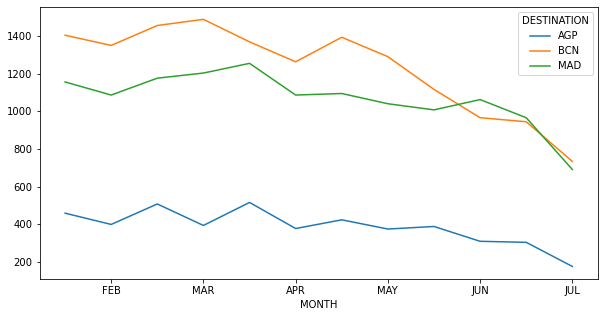

In [61]:
months_in_year = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

fig, ax = plt.subplots(1,1,figsize = (10,5))

pd.pivot_table(final_tble.reset_index(),
               index='MONTH', columns='DESTINATION', values='NUM'
              ).plot( ax=ax);
ax.set_xticklabels(months_in_year);

#plot.gcf()
#plt.gca().set_xticklabels(months_in_year);

In [ ]:
final_tble.shape()



fig,ax=plt.subplots(figsize=(10,8));

ax.hist(x, bins=100,density=True,color='green');

ax.set_xlabel('people')
ax.set_ylabel('Probability');
ax.text(60,.025,'$\mu=100,\sigma=15$')
ax.set_title('Histogram of people');
ax.grid()

## Ejercicio 4 <a name="Exercise4"></a>

Match searches with bookings
* For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match.
* For the bookings file, origin and destination are the columns dep_port and arr_port, respectively.
* Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

In [4]:
#sh_df= pd.read_csv('./searches.sample.csv.bz2', compression='bz2',  sep='^')
#bk_df= pd.read_csv('./bookings.sample.csv.bz2', compression='bz2',  sep='^')

In [2]:
#incluido el chunk para aligerar tiempos

chunksize=100000
bookings=pd.read_csv('/home/dsc/data/challenge/bookings.csv.bz2',
                     usecols=['cre_date           ','dep_port','arr_port'], 
                     compression='bz2', sep='^',chunksize=chunksize )

#bk_df= pd.read_csv('/home/dsc/data/challenge/bookings.csv.bz2',usecols=['cre_date           ','dep_port','arr_port'], compression='bz2', sep='^')
all_bookings=[]
for chunk in bookings:

    chunk.columns = chunk.columns.str.replace(' ', '').str.upper() #remove blanks from column name
    bk_df_key=chunk[['ARR_PORT','CRE_DATE','DEP_PORT']].dropna() # filtering columns and removing NaN      
    bk_df_key['ARR_PORT']=bk_df_key['ARR_PORT'].str.strip()#remove blanks in column arr_port
    bk_df_key['DEP_PORT']=bk_df_key['DEP_PORT'].str.strip()#remove blanks in column dep_port
    bk_df_key['CRE_DATE']=bk_df_key['CRE_DATE'].str[:10] 
    bk_df_key_no_dup=bk_df_key.drop_duplicates()
    all_bookings.append(bk_df_key_no_dup)
    
all_bookings=pd.concat(all_bookings).dropna().drop_duplicates()  
all_bookings=all_bookings.drop_duplicates()   


In [8]:
all_bookings.shape

(334876, 3)

In [31]:
#bk_df_key_no_dup=bk_df_key.drop_duplicates()

In [23]:
#bk_df_key.head()

In [24]:
# | head -1 | tr '^', '\n' sustituye el separador por salto linea a la hora de mostrarlo

In [19]:
#join_sh_bk= sh_df.merge(bk_df_key_no_dup, left_on=['Origin'], right_on=['DEP_PORT'], how="left")

In [29]:
#join_sh_bk['isBokking']=np.where(join_sh_bk['CRE_DATE'].isnull()==True,0,1)
#join_sh_bk

In [27]:
#join_sh_bk[join_sh_bk['isBokking']==1]

In [26]:
#join_sh_bk.drop_columns(['CRE_DATE','DEP_PORT','ARR_PORT'], inplace=True)

In [28]:
#sh_df.columns

In [16]:
#type(bk_df_key_no_dup)

In [17]:
#bk_df_key_no_dup.columns

In [18]:
#bk_df_key_no_dup.head(10)

In [12]:
all_bookings.head(10)

,ARR_PORT,CRE_DATE,DEP_PORT
0,LHR,2013-02-22,ZRH
1,CLT,2013-03-26,SAL
3,SVO,2013-03-26,AKL
5,LGA,2013-03-20,DEN
7,SIN,2013-03-25,NRT
19,TUS,2013-03-13,YYZ
20,CTA,2013-03-12,FCO
22,YWG,2013-03-12,BDQ
30,PVG,2013-03-12,CDG
33,SGC,2013-03-12,SIP


### primera versión
#preparamos la importación del fichero con chuncks para poder tratarlo

chunksize = 1000000
filename='/home/dsc/data/challenge/searches.csv.bz2'
searches=pd.read_csv(filename, compression='bz2',  sep='^',chunksize=chunksize)

list_of_chunks=[]

for chunk in searches:
    join_sh_bk= chunk.merge( all_bookings, left_on=['Date','Origin','Destination'], 
                                right_on=['CRE_DATE','DEP_PORT','ARR_PORT'], how='left')
    
    join_sh_bk['isBokking']=np.where(join_sh_bk['CRE_DATE'].isnull()==True, 0 ,1)
    join_sh_bk.drop(['CRE_DATE','DEP_PORT','ARR_PORT'],axis=1, inplace=True)
    list_of_chunks.append(join_sh_bk)
    

final_tble=pd.concat(list_of_chunks)
#print (f'número de chunks= {nchunk}')
            
final_tble.to_csv('searches_booked.csv.bz2',sep='^',compression='bz2')


In [6]:
#final_tble.head(10)

NameError: name 'final_tble' is not defined

In [4]:
#NOTA: se puede ir almacenando cada salida del chunk en el output (csv) en modo append
   
chunksize = 1000000
mode='w'
header=True

filename='/home/dsc/data/challenge/searches.csv.bz2'
searches=pd.read_csv(filename, compression='bz2',  sep='^',chunksize=chunksize)

#list_of_chunks=[]

for chunk in searches:
    join_sh_bk= chunk.merge( all_bookings, left_on=['Date','Origin','Destination'], 
                                right_on=['CRE_DATE','DEP_PORT','ARR_PORT'], how='left')
    
    join_sh_bk['isBokking']=np.where(join_sh_bk['CRE_DATE'].isnull()==True, 0 ,1)
    join_sh_bk.drop(['CRE_DATE','DEP_PORT','ARR_PORT'],axis=1, inplace=True)
    #list_of_chunks.append(join_sh_bk)
    
    join_sh_bk.to_csv('searches_booked.csv.bz2',sep='^',compression='bz2', header=header, mode=mode) 
    # primera vez modo w-rite con header, posteriores sin header y modo a-ppend
    mode='a'
    header=False

#final_tble=pd.concat(list_of_chunks)
#print (f'número de chunks= {nchunk}')           


/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (40,41,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,44) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
!bzcat searches_booked.csv.bz2 | wc -l # conteo de las filas del fich final = inicial = 20390198


20390199


## Exercise 5

Write a Web Service
* Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output).
* The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X